In [3]:
import pandas as pd
import numpy as np

import sidetable as stb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

from datetime import datetime

In [4]:
df = pd.read_pickle("../data/df_EDA.pkl")
df.head(2)

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
0,2018-01-01,Invierno,2018,enero,no_festivo,lunes,0,2,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,Invierno,2018,enero,no_festivo,martes,0,2,17.68695,69.6087,16.652113,131,670,801


In [5]:
#Hacemos dos listas con variables numéricas y variables categóricas

lista_num = ['sensacion_termica', 'humedad', 'velocidad_viento', 'alquiler_casual', 'alquiler_registrado', 'total_alquileres']
lista_cat = ['estacion', 'año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']
lista_cat2 = ['año', 'mes', 'festivo', 'dia_sem', 'laborable', 'prevision_tiempo']

In [6]:
dict(enumerate(lista_num))

{0: 'sensacion_termica',
 1: 'humedad',
 2: 'velocidad_viento',
 3: 'alquiler_casual',
 4: 'alquiler_registrado',
 5: 'total_alquileres'}

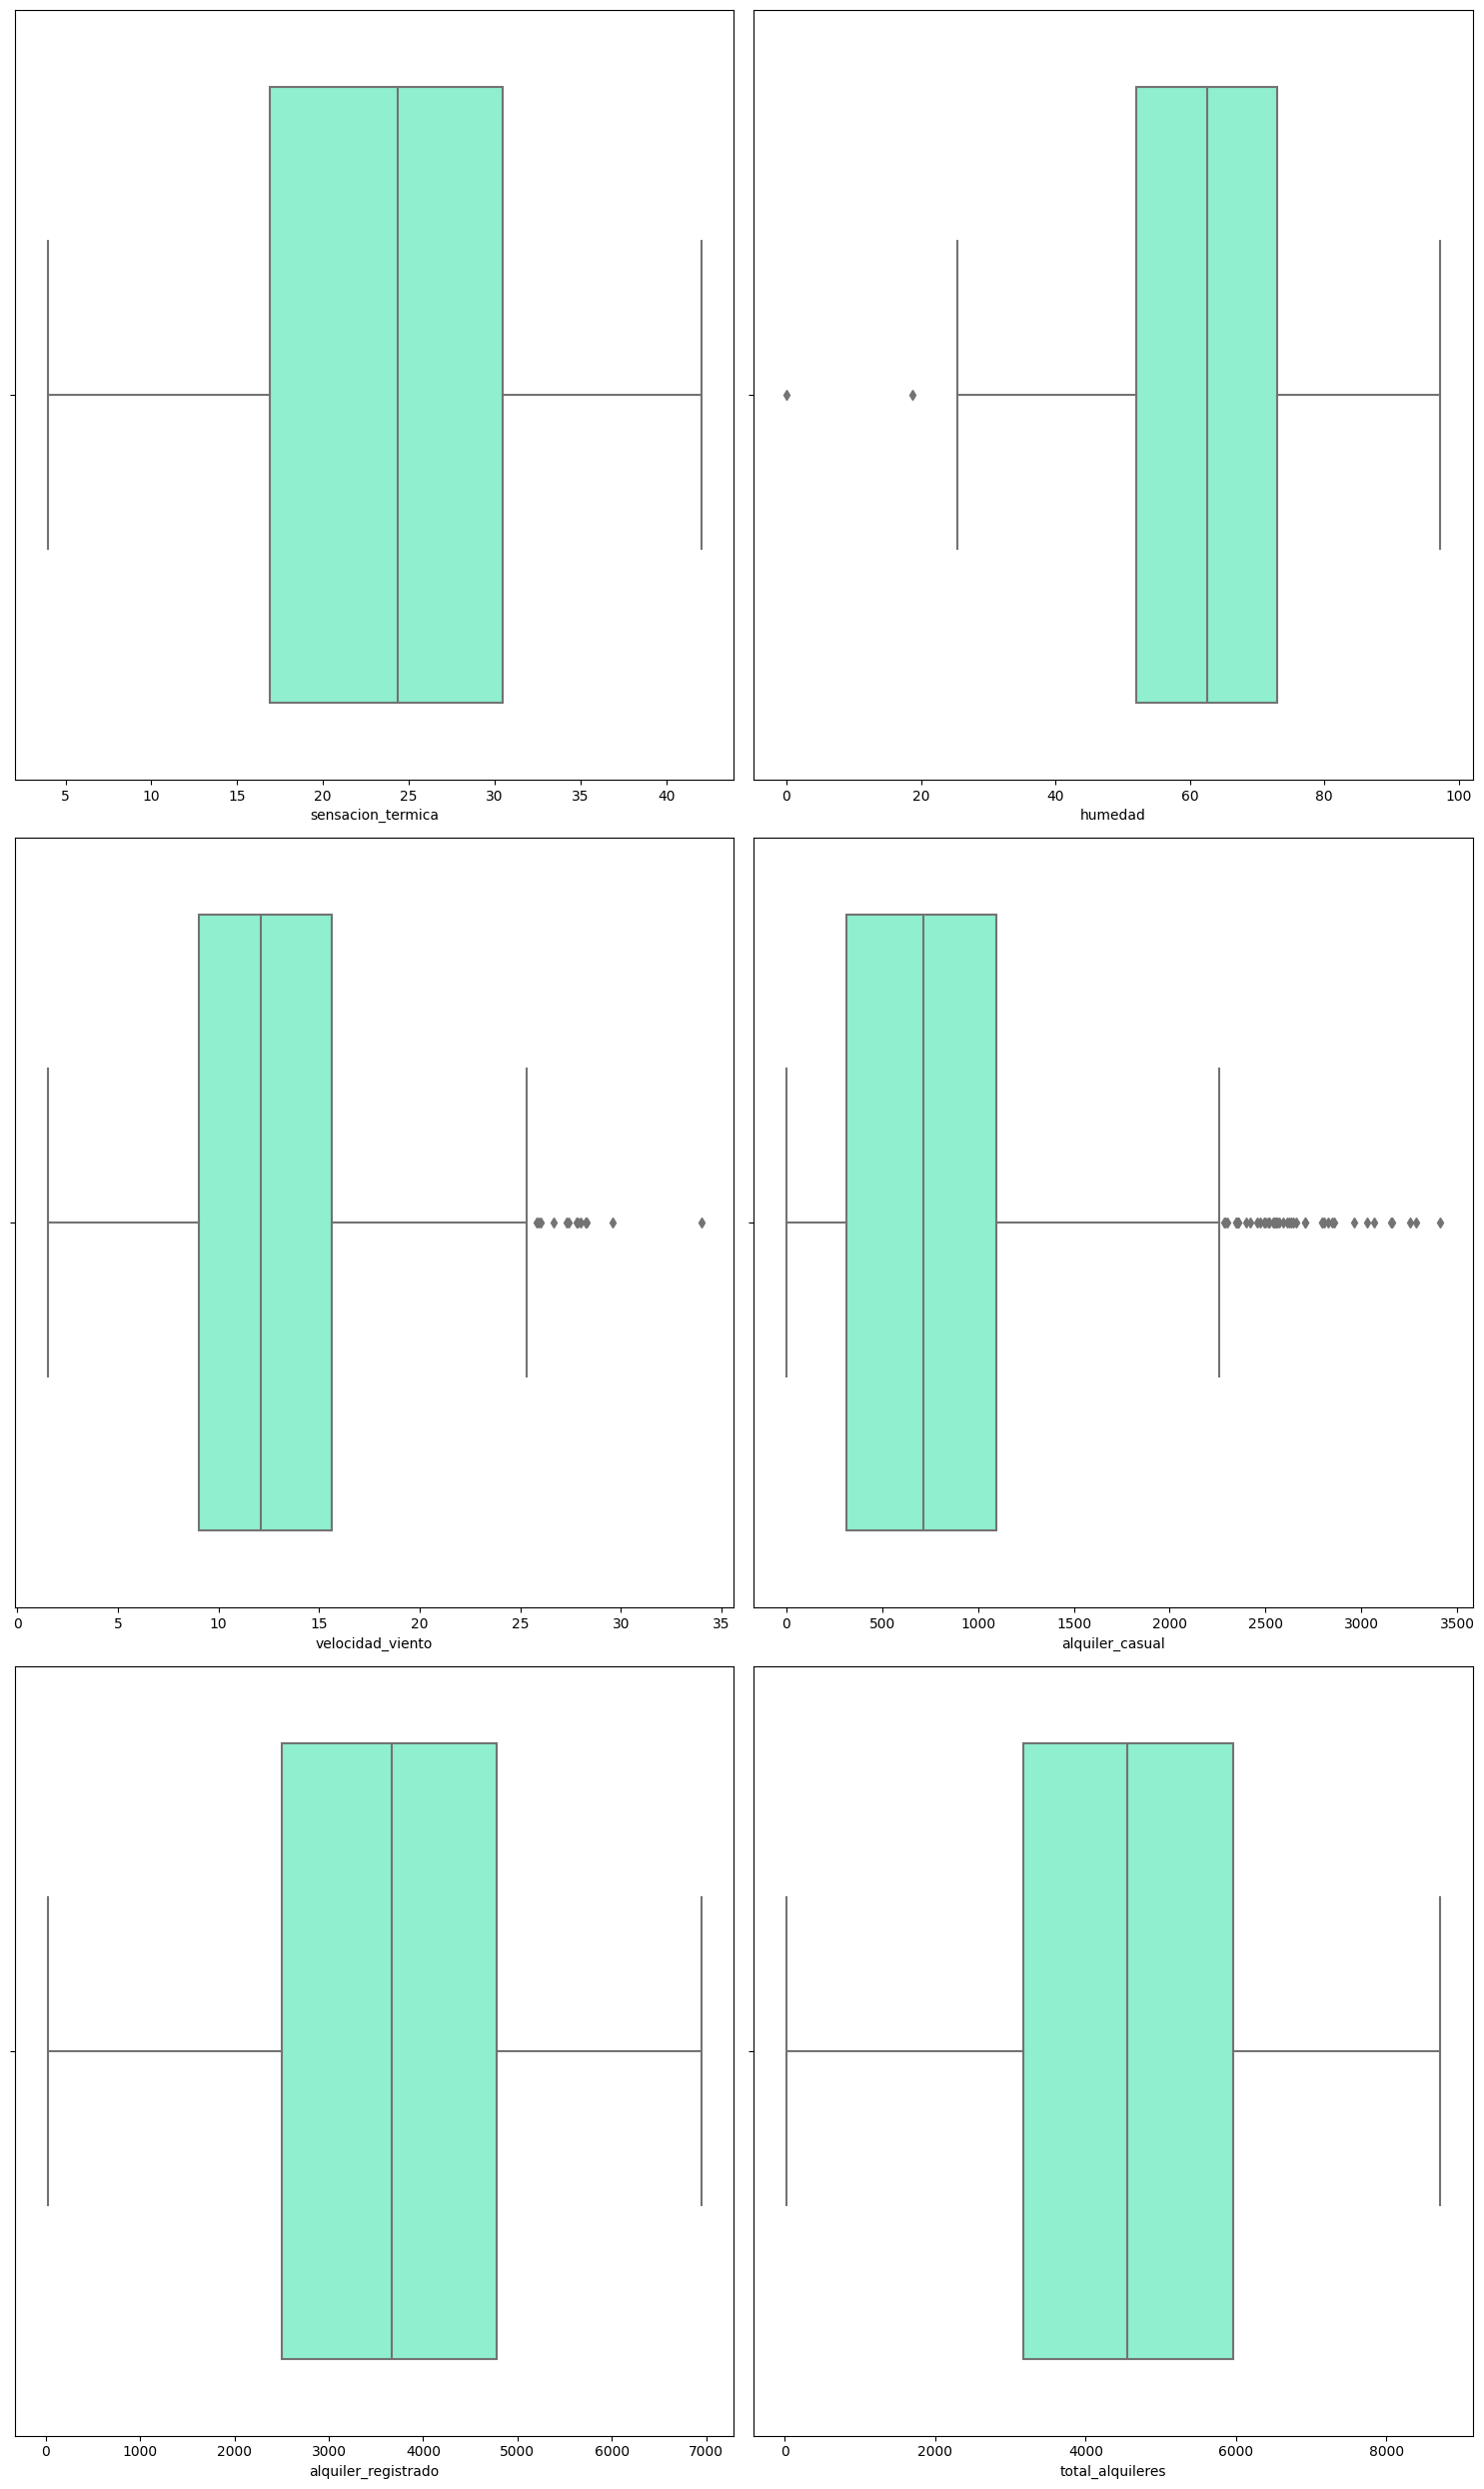

In [7]:
#Realizamos los boxplot de las variables numéricas

fig, axes = plt.subplots(3, 2, figsize=(15, 25))
axes = axes.flat

for indice, elemento in enumerate(lista_num):
    sns.boxplot(x = elemento, data = df, ax=axes[indice], color = "aquamarine")
    
    
plt.tight_layout()
plt.show();

CONCLUSIONES

Estas son las columnas que presentan outliers:

    -humedad: consideramos que humedad 0 es un error ya que es un valor que sólo se da en desiertos. Es sólo 1 registro así que lo gestionaremos.
    -velocidad_viento: Entendemos que las medidas están en nudos. Entre 17 -22 nudos se considera fresco, entre 22 - 34 se considera fuerte y por encima de 34 nudos se considera temporal. Sólo tenemos un solo registro por encima de 34. Como nos parece un registro real, decidimos dejarlo como está.
    -alquiler_casual: hay outliers, pero justo coinciden que en la "prevision_tiempo" era de 1, es decir, que era bueno. Por lo que el tiempo meteorológico afectó positivamente al alquiler de las bicis.
    Finalmente, decidimos gestionar el dato 0 de "Humedad",transformando su valor a la mediana porque no queremos perder el registro entero para mantener todas las fechas de los dos años.

In [8]:
df[df['alquiler_casual'] > 3000]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
184,2018-07-04,Verano,2018,julio,festivo,miercoles,0,2,33.27085,63.7917,5.459106,3065,2978,6043
440,2019-03-17,Invierno,2019,marzo,no_festivo,domingo,0,2,25.25230,75.5833,7.417168,3155,4681,7836
461,2019-04-07,Primavera,2019,abril,no_festivo,domingo,0,1,21.30645,25.4167,18.416357,3252,3605,6857
503,2019-05-19,Primavera,2019,mayo,no_festivo,domingo,0,1,28.34540,45.6250,5.626325,3410,4884,8294
511,2019-05-27,Primavera,2019,mayo,no_festivo,lunes,0,1,32.07125,69.7083,14.416457,3283,3308,6591
622,2019-09-15,Verano,2019,septiembre,no_festivo,domingo,0,1,29.29335,50.1667,16.583907,3160,5554,8714
643,2019-10-06,Otoño,2019,octubre,no_festivo,domingo,0,1,26.92605,66.4167,17.957675,3031,4934,7965


In [9]:
df[df['humedad'] == 0]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
68,2018-03-10,Invierno,2018,marzo,no_festivo,sabado,1,3,19.2834,0.0,17.545759,46,577,623


In [10]:
mediana = df["humedad"].median()

In [11]:
df.loc[68, ["humedad"]] = mediana

In [12]:
df.loc[68, ["humedad"]]

humedad    62.625
Name: 68, dtype: object

In [13]:
df[df['velocidad_viento'] >= 34]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
49,2018-02-19,Invierno,2018,febrero,no_festivo,lunes,0,1,19.5702,18.7917,34.000021,532,1103,1635


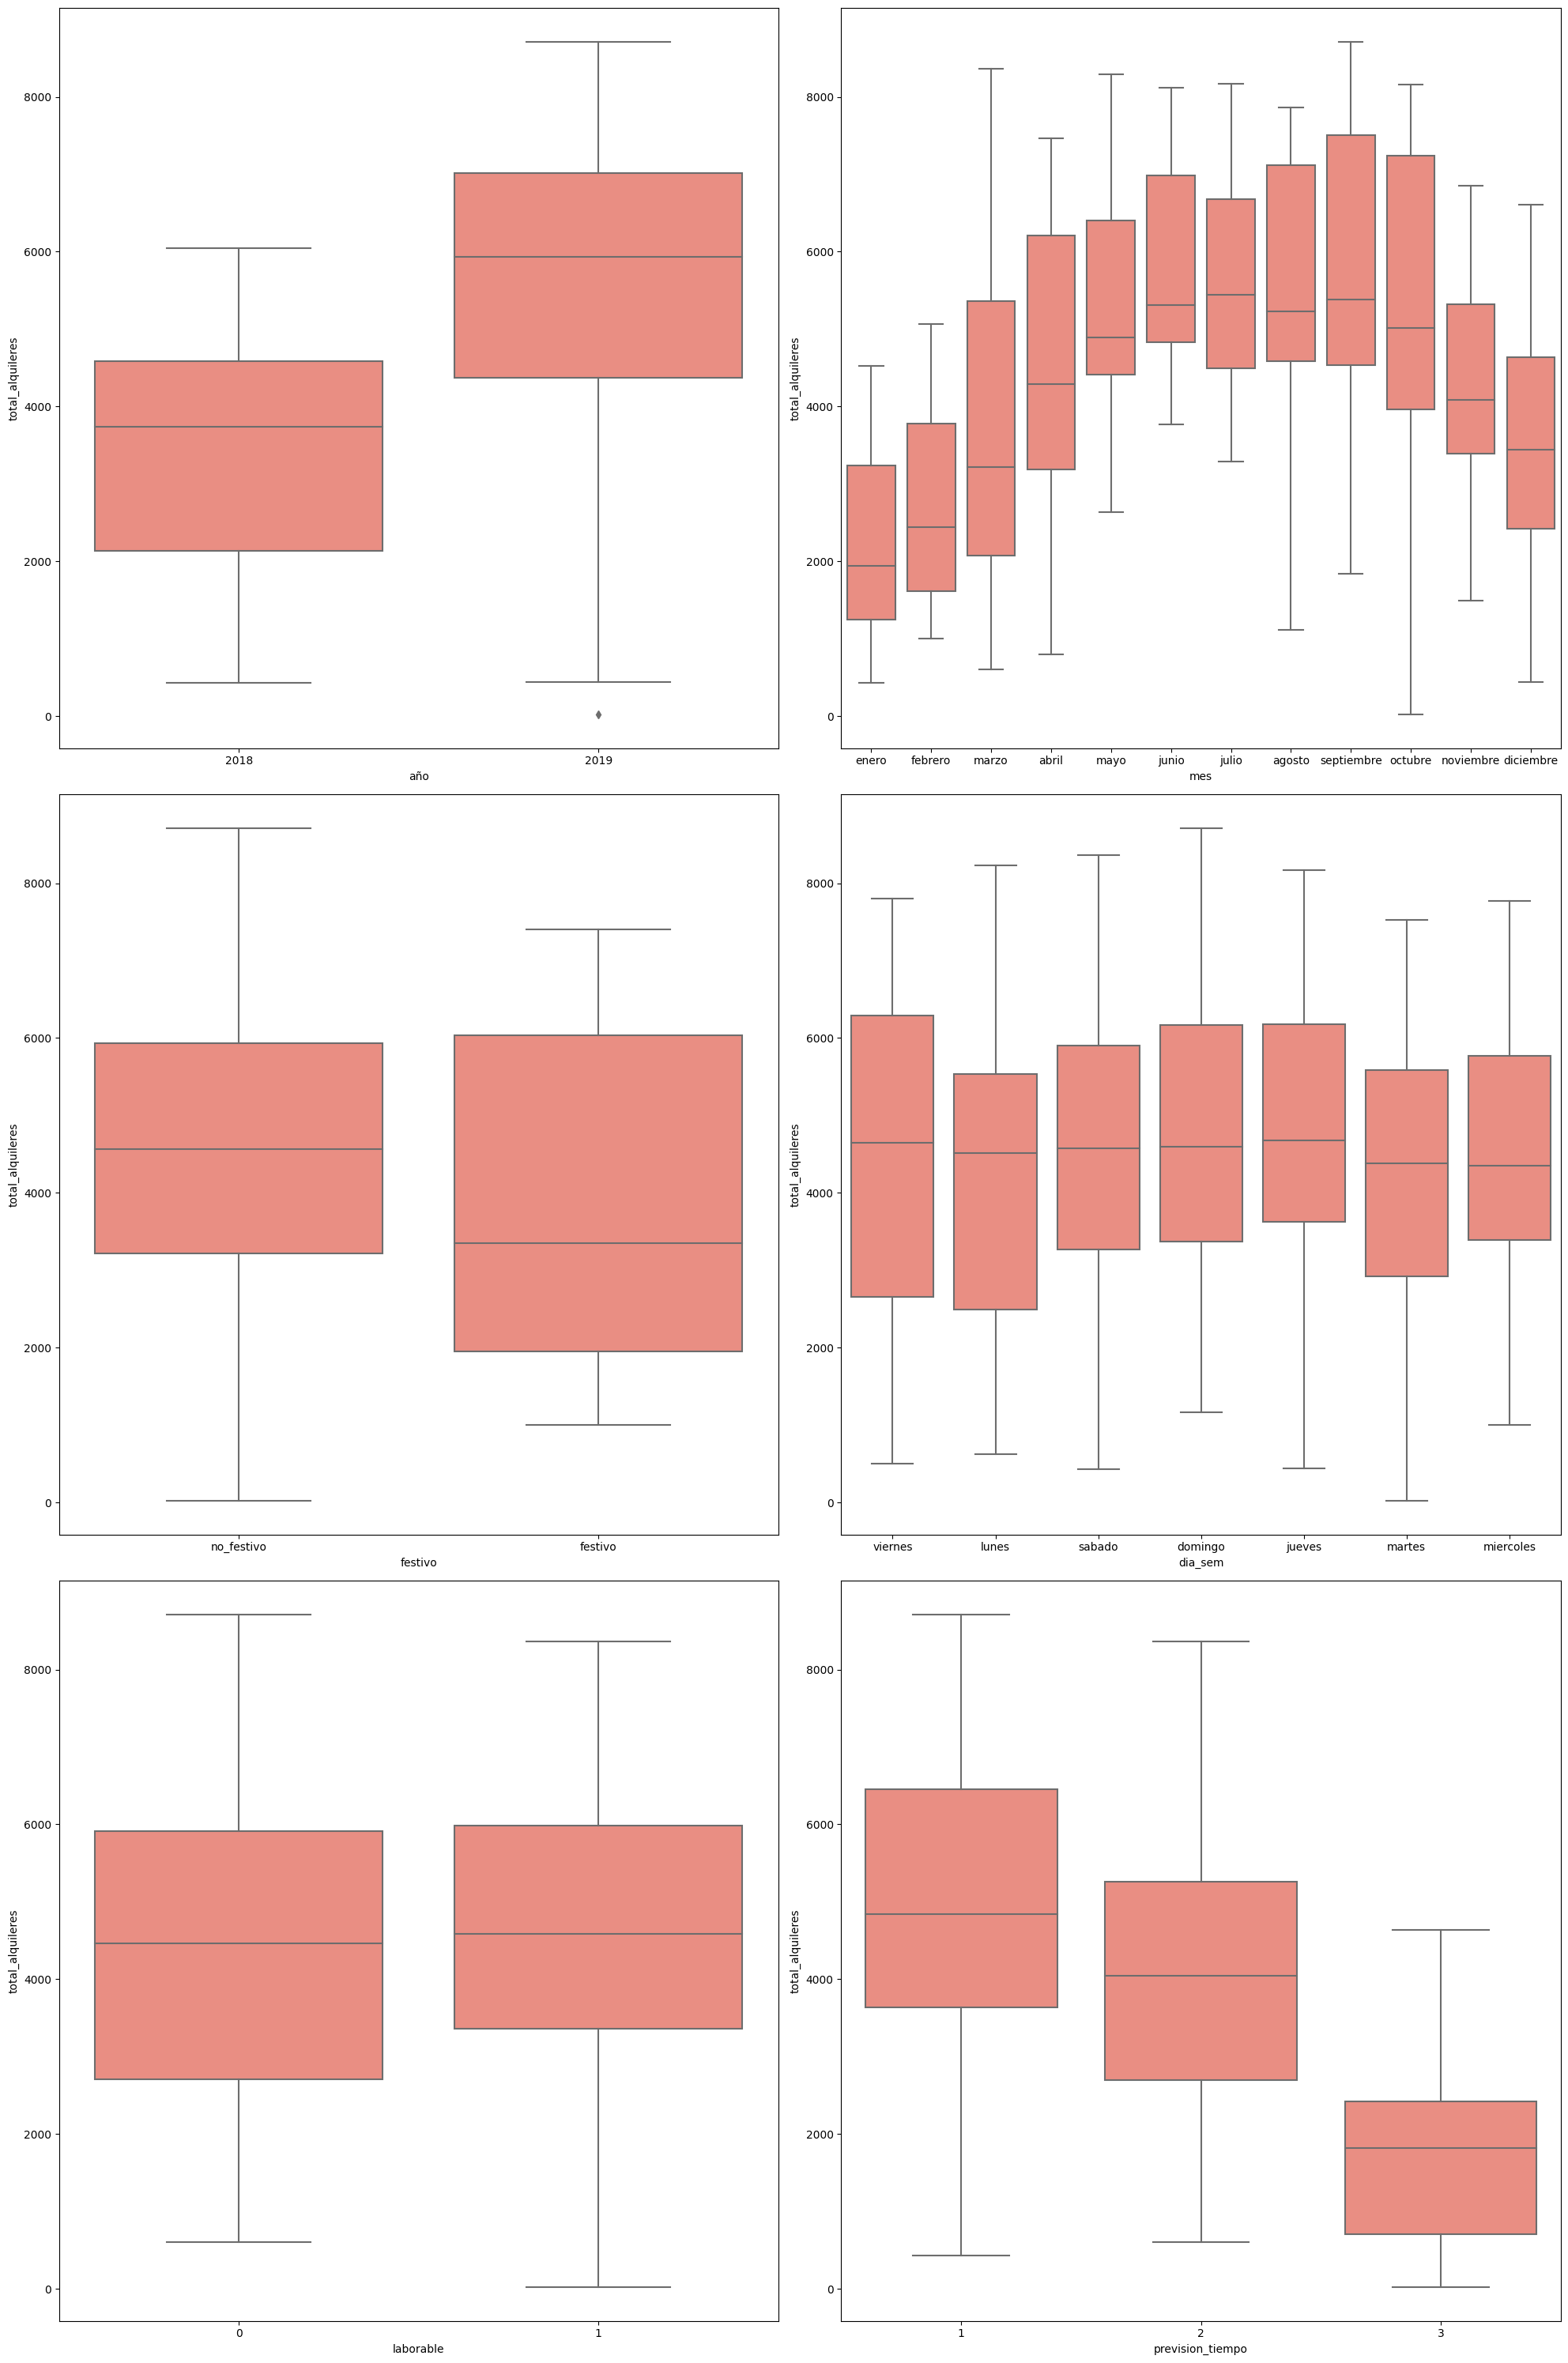

In [14]:
#Realizamos los boxplot de las variables categoricas

fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flat

for indice, elemento in enumerate(lista_cat2):
    sns.boxplot(y = "total_alquileres", x= elemento, data = df, ax=axes[indice], color = "salmon")
    
    
plt.tight_layout()
plt.show()

In [15]:
df[df['total_alquileres'] <= 50]

,fecha,estacion,año,mes,festivo,dia_sem,laborable,prevision_tiempo,sensacion_termica,humedad,velocidad_viento,alquiler_casual,alquiler_registrado,total_alquileres
666,2019-10-29,Otoño,2019,octubre,no_festivo,martes,1,3,21.97,88.0,23.9994,2,20,22


Como la "prevision_tiempo" tiene valor 3, es decir, había un poco de nieve, lluvia y truenos. Tiene sentido que solamente hubiera un alquiler de 22 en total y 2 de al quiler registrado. Por lo tanto, vamos a mantener este outlier.

In [16]:
df['festivo'].value_counts()

festivo
no_festivo    709
festivo        21
Name: count, dtype: int64

CONCLUSION

Hay outliers en la columna de festivos, ya que hay bastante más días que no son festivos (0) que días que son festivos (1)

In [17]:
df.to_pickle("../data/outliers_gestion.pkl")